# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [2]:
#cargamos librerias
library("dplyr",lib.loc = "/home/vagrant/R/x86_64-pc-linux-gnu-library/3.2")
library("reshape",lib.loc = "/home/vagrant/R/x86_64-pc-linux-gnu-library/3.2") 

In [3]:
# leemos los datos del csv
df<-read.csv("datos/BCSC_risk_factors_summarized.csv",sep=",",header = T)

In [4]:
#ponemos los duplicados donde la columna count nos indique
df <- df[rep(row.names(df), df$count), 1:(ncol(df)-1)]

In [5]:
#seleccionamos muestra
set.seed(12345)
df_sample <- df[sample(nrow(df),5000),]

In [6]:
#quitar desconocidos
df_sample[,3:12][df_sample[,3:12] == 9] <- NA

In [7]:
 df_sample$BIRADS_breast_density <- factor(df_sample$BIRADS_breast_density, labels = c("Almost entirely fat","Scattered fibroglandular densities","Heterogeneously dense","Extremely dense"))

In [8]:
df_sample$race_eth <- factor(df_sample$race_eth,labels = c("Non-Hispanic white","Non-Hispanic black", "Asian/Pacific Islander" , "Native American" , "Hispanic", "Other/mixed"))

In [9]:
df_sample$first_degree_hx<-factor(df_sample$first_degree_hx,labels = c("NO","SI"))

El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [10]:
#Definimos una semilla común para todos:
#set.seed(12345)

Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [11]:
media <- c(mean(18:29), 32,37,42,47,52,57,62,67,72,77,82,87)
edad <- data.frame (grupo = c(1:13),med = media)
head(edad)

grupo,med
1,23.5
2,32.0
3,37.0
4,42.0
5,47.0
6,52.0


In [12]:
df2 <- cbind(df_sample, edad_estimada=edad[df_sample$age_group_5_years, 2])

In [13]:
df2 <- df2 %>% filter(!is.na(first_degree_hx))

In [14]:
library(ggplot2)

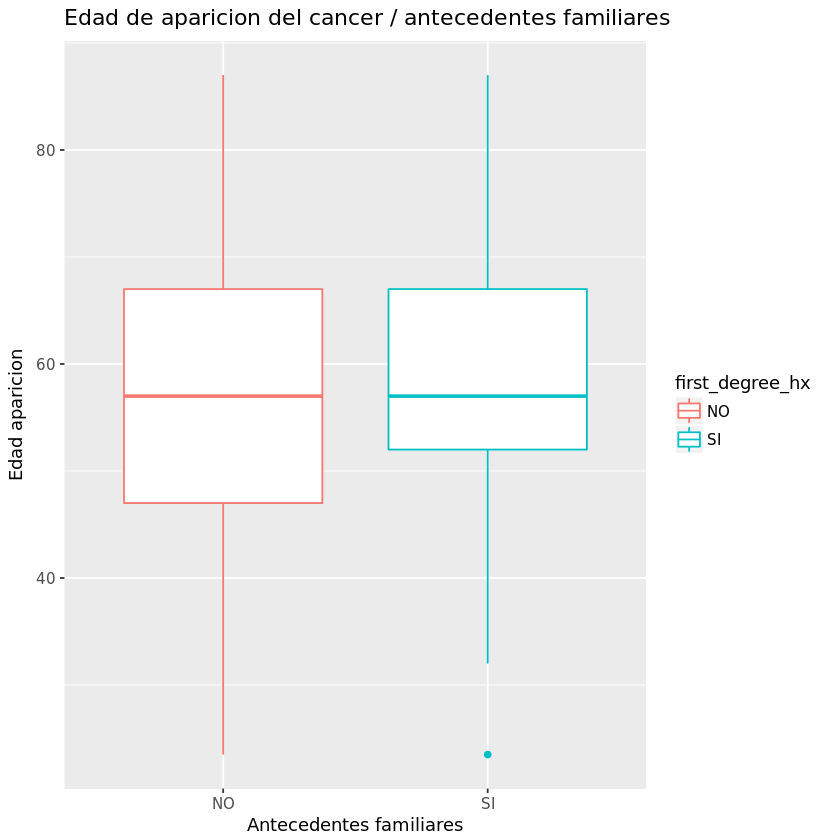

In [15]:

ggplot (df2, aes(x=first_degree_hx, y=edad_estimada, group=first_degree_hx, color=first_degree_hx))+geom_boxplot()+ labs(title="Edad de aparicion del cancer / antecedentes familiares" , x="Antecedentes familiares", y="Edad aparicion")


In [16]:
df_edad_saf <- subset(na.omit(df2), first_degree_hx == "NO")
df_edad_caf <- subset(na.omit(df2), first_degree_hx == "SI")

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [19]:
mean(df_edad_saf$edad_estimada, na.rm = TRUE)
mean(df_edad_caf$edad_estimada, na.rm = TRUE)

[1] 57.01967

[1] 57.78274

Observamos una pequeña variacion entre las medias al calcularlas y en la grafica no se aprecia debido al sesgo introducido al estimar la edad

In [21]:
shapiro.test(df_edad_caf$edad_estimada)


	Shapiro-Wilk normality test

data:  df_edad_caf$edad_estimada
W = 0.96645, p-value = 0.0004374


In [22]:
shapiro.test(df_edad_saf$edad_estimada)


	Shapiro-Wilk normality test

data:  df_edad_saf$edad_estimada
W = 0.96698, p-value = 4.797e-11


Al obtener los test de Shapiro con un p-value tan bajo no son gaussianas por lo que tendremos que aplicar el test de wilcox-mann-whitney

In [23]:
wilcox.test(edad_estimada ~ first_degree_hx, data=df2, na.rm = TRUE) 


	Wilcoxon rank sum test with continuity correction

data:  edad_estimada by first_degree_hx
W = 1239200, p-value = 2.339e-06
alternative hypothesis: true location shift is not equal to 0


El p-value < 0.05 del test de wilcox indica que **existe relación entre edad y antecedentes familiares** como se puede comprobar en el gráfico siguiente donde comparamos las distribuciones de densidad

Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

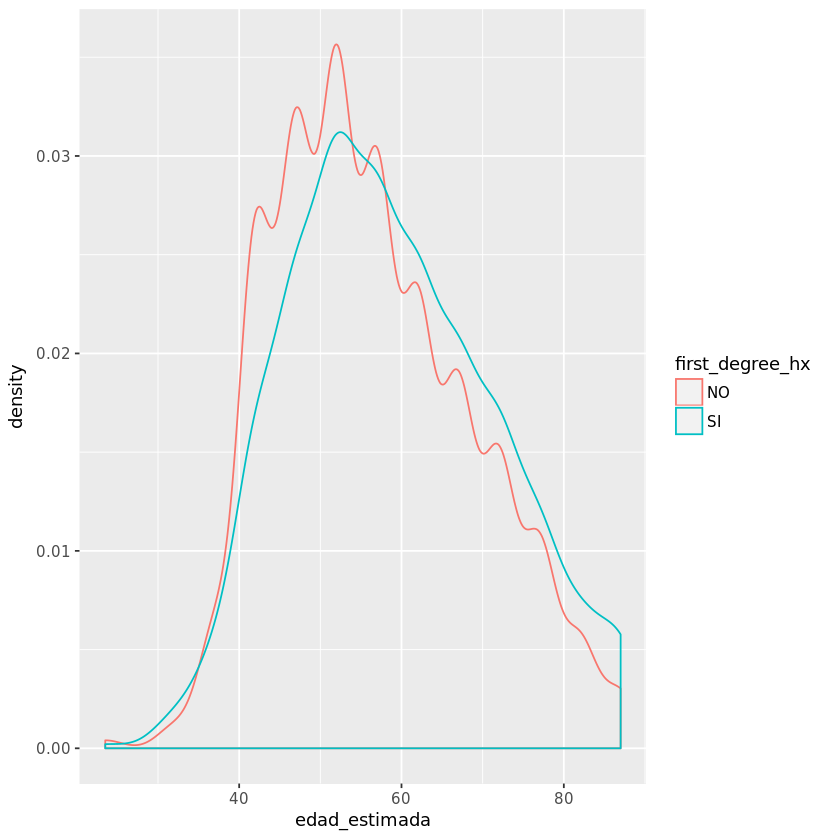

In [26]:
#vamos a comparar si dos variables independientes vienen de la misma distribución
ggplot(df2,aes(x=edad_estimada,group=first_degree_hx,color=first_degree_hx))+geom_density()

En este gráfico se puede comprobar que no se trata de distribuciones gaussianas y ademas que existe diferencia entre las mismas tal y como nos lo indica el test de wilcox.

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

In [27]:
df2 <- df2 %>% filter(!is.na(BIRADS_breast_density))

In [28]:
df.grupo1 <- subset(df2, BIRADS_breast_density == 'Almost entirely fat')
df.grupo2 <- subset(df2, BIRADS_breast_density == 'Scattered fibroglandular densities')
df.grupo3 <- subset(df2, BIRADS_breast_density == 'Heterogeneously dense')
df.grupo4 <- subset(df2, BIRADS_breast_density == 'Extremely dense')

In [29]:
shapiro.test(df.grupo1$edad_estimada)


	Shapiro-Wilk normality test

data:  df.grupo1$edad_estimada
W = 0.97898, p-value = 0.0003947


In [30]:
shapiro.test(df.grupo2$edad_estimada)


	Shapiro-Wilk normality test

data:  df.grupo2$edad_estimada
W = 0.96289, p-value < 2.2e-16


In [31]:
shapiro.test(df.grupo3$edad_estimada)


	Shapiro-Wilk normality test

data:  df.grupo3$edad_estimada
W = 0.95669, p-value < 2.2e-16


In [32]:
shapiro.test(df.grupo4$edad_estimada)


	Shapiro-Wilk normality test

data:  df.grupo4$edad_estimada
W = 0.93339, p-value = 7.871e-09


In [33]:
df.birads <- na.omit(data.frame(edad = df2$edad_estimada, birads = df2$BIRADS_breast_density))

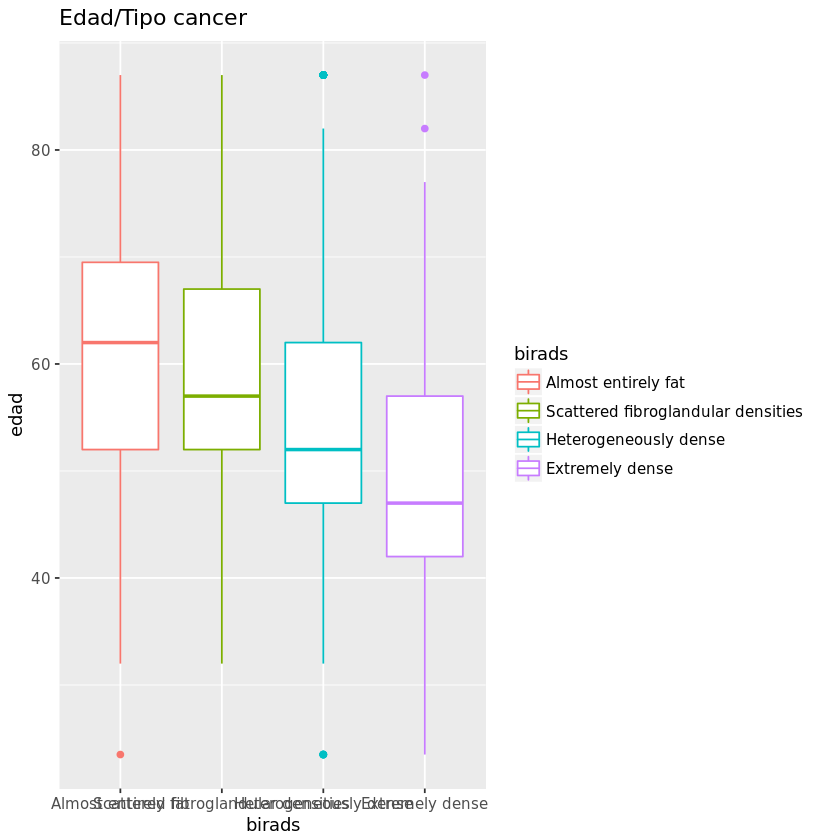

In [35]:
ggplot(data=df.birads,aes(x=birads, y = edad, color = birads)) +  geom_boxplot() + labs(title="Edad/Tipo cancer")

Debido a que segun Shapiro no son gaussianas, para comparar las medias utilizamos Kruskal-Walls

In [37]:
kruskal <- rbind(data.frame(value = df.grupo1$edad_estimada, cl="1"),data.frame(value = df.grupo2$edad_estimada, cl="2"), data.frame(value = df.grupo3$edad_estimada, cl="3"), data.frame(value = df.grupo4$edad_estimada, cl="4"))

In [38]:
kruskal.test(data = kruskal, value ~ cl)


	Kruskal-Wallis rank sum test

data:  value by cl
Kruskal-Wallis chi-squared = 147.68, df = 3, p-value < 2.2e-16


#### Conclusiones
Al no tratarse de variables gaussianas (comprobado mediante el test de Shapiro), realizamos Kruskal que nos da un p-value < 0.05 indicando que existe alguna media distinta de las que estamos evaluando tal y como se puede apreciar en el diagrama de cajas que hemos realizado anteriormente. **Podemos concluir que la edad varía en función del tipo de cancer**

#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

Para comprobar si son igual de probables utilizaremos el test de homogeneidad

In [42]:
birads <- factor(na.omit(df2$BIRADS_breast_density))
birads.df2 <- data.frame(cases = summary(birads))
birads.df2$ratio <- c(birads.df2$cases/sum(birads.df2$cases)*100)
birads.df2

,cases,ratio
Almost entirely fat,279,8.086957
Scattered fibroglandular densities,1572,45.565217
Heterogeneously dense,1364,39.536232
Extremely dense,235,6.811594


In [41]:
#test de homogeneidad
prueba <- c(nrow(df.grupo1),nrow(df.grupo2),nrow(df.grupo3),nrow(df.grupo4))
cst <- chisq.test(prueba)
cst
cst$p.value


	Chi-squared test for given probabilities

data:  prueba
X-squared = 1726.5, df = 3, p-value < 2.2e-16


[1] 0

#### DEBIDO AL TEST DE HOMOGENEIDAD LAS VARIABLES SE ENCUENTRAN RELACIONADAS. EXISTEN TIPOS DE CANCER CON UNA INCIDENCIA MAYOR QUE OTROS

¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

El tipo de cancer más común es el Scattered fibroglandular densities con una proporción (si suponemos los NAs son otros tipos desconocidos) del 45.57% 

¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [43]:
tab1 <- table(df2$first_degree_hx,df2$BIRADS_breast_density)
tab1

    
     Almost entirely fat Scattered fibroglandular densities
  NO                 223                               1324
  SI                  56                                248
    
     Heterogeneously dense Extremely dense
  NO                  1135             190
  SI                   229              45

In [44]:
chisq.test(tab1)


	Pearson's Chi-squared test

data:  tab1
X-squared = 4.2475, df = 3, p-value = 0.236


Realizamos el test de independencia de chi cuadrado
p-value > 0.05 por lo que las variables son estadisticamente independientes y no hay relacion entre los antecedentes familiares y el tipo de cancer 
#### NO EXISTE RELACIÓN ENTRE SI EXISTEN ANTECEDENTES DE CANCER Y EL TIPO DE CANCER

¿Depende el tipo de cancer BIRADS del grupo étnico?

In [45]:
df2 <- df2 %>% filter(!is.na(race_eth))

In [46]:
tab2 <- table(df2$race_eth,df2$BIRADS_breast_density)
tab2

                        
                         Almost entirely fat Scattered fibroglandular densities
  Non-Hispanic white                     197                               1151
  Non-Hispanic black                      19                                 92
  Asian/Pacific Islander                  10                                 50
  Native American                          1                                  7
  Hispanic                                23                                 91
  Other/mixed                              2                                 17
                        
                         Heterogeneously dense Extremely dense
  Non-Hispanic white                       959             166
  Non-Hispanic black                        81               8
  Asian/Pacific Islander                    83              27
  Native American                            5               3
  Hispanic                                  92              11
  Other/mixe

In [47]:
chi2 <- chisq.test(tab2,simulate.p.value = T)

In [48]:
chi2


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  tab2
X-squared = 45.76, df = NA, p-value = 0.0004998


Debido a que algunas celdas tienes un valor pequeño tendremos que utilizar chi cuadrado con la corrección de Yates. El p-value nos indica que existe relación entre las variables
#### DADO EL BAJO VALOR DE P-VALUE EXISTE RELACIÓN ENTRE ETNIA Y TIPO DE CANCER

In [49]:
contrib <- 100*chi2$residuals^2/chi2$statistic
round(contrib,2)

                        
                         Almost entirely fat Scattered fibroglandular densities
  Non-Hispanic white                    0.11                               2.06
  Non-Hispanic black                    1.07                               0.06
  Asian/Pacific Islander                2.25                              20.55
  Native American                       0.15                               0.02
  Hispanic                              3.67                               1.14
  Other/mixed                           0.72                               0.01
                        
                         Heterogeneously dense Extremely dense
  Non-Hispanic white                      1.09            0.65
  Non-Hispanic black                      0.08            5.63
  Asian/Pacific Islander                  7.84           41.83
  Native American                         0.63            6.89
  Hispanic                                0.89            2.53
  Other/mixe

En la tabla anterior se puede observar la relación relativa entre las variables etnia y tipo de cancer

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

El cálculo lo realizaremos sin NAs por lo que crearemos subgrupos cogiendo los parámetros que nos interesen y de esta forma los NAs no influirán

Para comprobarlo lo realizaremos de dos formas:
* haciendo la tabla de frecuencias
* mediante la aproximacion a una distribucion binomial

In [78]:
#grupo1
#hacemos un subgrupo que contenga "Native American" con cancer del tipo "Almost entirely fat"
grupo1_native_american <- subset(df.grupo1, race_eth == 'Native American')
tipo1_na <- nrow(grupo1_native_american)
tipo1_na

[1] 1

In [79]:
#grupo1
#calculamos el tipo de cancer "Almost entirely fat" para el resto de etnias
grupo1_otros <- subset(df.grupo1,race_eth == 'Non-Hispanic white' | race_eth == 'Non-Hispanic black' | race_eth == 'Asian/Pacific Islander' | race_eth == 'Hispanic' | race_eth == 'Other/mixed')
tipo1_otros <- nrow(grupo1_otros)
tipo1_otros

[1] 251

In [80]:
#grupo2
#hacemos un subgrupo que contenga "Native American" con cancer del tipo 2
grupo2_native_american <- subset(df.grupo2, race_eth == 'Native American')
nrow(grupo2_native_american)

[1] 7

In [81]:
#grupo2
#calculamos el tipo de cancer 2 para el resto de etnias
grupo2_otros <- subset(df.grupo2,race_eth == 'Non-Hispanic white' | race_eth == 'Non-Hispanic black' | race_eth == 'Asian/Pacific Islander' | race_eth == 'Hispanic' | race_eth == 'Other/mixed')
nrow(grupo2_otros)

[1] 1401

In [82]:
#grupo3
#hacemos un subgrupo que contenga "Native American" con cancer del tipo 3
grupo3_native_american <- subset(df.grupo3, race_eth == 'Native American')
nrow(grupo3_native_american)

[1] 5

In [83]:
#grupo3
#calculamos el tipo de cancer 3 para el resto de etnias
grupo3_otros <- subset(df.grupo3,race_eth == 'Non-Hispanic white' | race_eth == 'Non-Hispanic black' | race_eth == 'Asian/Pacific Islander' | race_eth == 'Hispanic' | race_eth == 'Other/mixed')
nrow(grupo3_otros)

[1] 1230

In [84]:
#grupo4
#hacemos un subgrupo que contenga "Native American" con cancer del tipo 4
grupo4_native_american <- subset(df.grupo4, race_eth == 'Native American')
nrow(grupo4_native_american)

[1] 3

In [85]:
#grupo4
#calculamos el tipo de cancer 4 para el resto de etnias
grupo4_otros <- subset(df.grupo2,race_eth == 'Non-Hispanic white' | race_eth == 'Non-Hispanic black' | race_eth == 'Asian/Pacific Islander' | race_eth == 'Hispanic' | race_eth == 'Other/mixed')
nrow(grupo4_otros)

[1] 1401

In [86]:
#native american y grupo 2,3 y 4
na_otros_tipos <- nrow(grupo2_native_american) + nrow(grupo3_native_american) + nrow(grupo4_native_american)
na_otros_tipos

[1] 15

In [87]:
#otras etnias y grupo 2,3,4
otras_etnias_otros_tipos <- nrow(grupo2_otros) + nrow(grupo3_otros) + nrow(grupo4_otros)
otras_etnias_otros_tipos

[1] 4032

In [89]:
binom.test(1,17,conf.level = 0.95)


	Exact binomial test

data:  1 and 17
number of successes = 1, number of trials = 17, p-value = 0.0002747
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.001488174 0.286889397
sample estimates:
probability of success 
            0.05882353 


In [ ]:
La probabilidad es 5.8% y el rango del 95 % es [0.001488174,0.286889397]